# Neutron Detection Using Clustering

Authors: Su-Ann Chong and Rebecca Brink

Contibuters: Dr. Michela Taufer and Nigel Tan 

## Motivation

The increased popularity in neutron scattering has led to the development of neutron sources of unprecedented neutron brightness such as the European Spallation Source (ESS) in Lund, Sweden and the Second Target Station at the Spallation Neutron Source (SNS) in Oak Ridge, USA. The advancement in the next-generation neutron sources calls for a concurrent improvement in neutron detector technology. One of the main challenges faced by current detector technology is in terms of rate capability. We aim to develop a neutron detector that is capable of handling such a high rate in order to prevent detector technology from becoming the bottleneck of the scientific performance of the advanced neutron facilities. Despite being able to cope with a high detection rate, it is challenging to ensure that our detector system is mostly detecting neutrons. It is an intrinsic problem that all neutron events are typically accompanied by gamma events. It is impossible to have a perfectly clean neutron source. However, depending on the type of neutron converter used, the degree of difficulty in neutron-gamma discrimination can vary. Some neutron detectors are inherently insensitive to gamma-rays, hence neutron-gamma discrimination is less of an issue. Some neutron detectors are, unfortunately, sensitive to both neutrons and gamma-rays. Our detector system falls in the latter category. Hence, in this project, we will have a dataset of signals obtained using our neutron detector. The dataset will contain signals that come from neutron events, gamma events, background radiation, and noise. We aim to use machine learning algorithm such as support vector machine to help distinguish neutron events in our dataset. Since this is a high-rate detector, we also aim to incorporate parallel processing using PySpark to expedite the data processing time.


## Contributions

We aim to develop a real-time processing framework in particle identification for high rate detection systems. Since the dataset is not originally annotated with the correct labels, we want to perform unsupervised machine learning algorithms to cluster the type of signal events. It might be difficult to evaluate the performance of our learning algorithms using an unlabeled dataset, but we are still looking into appropriate evaluation metrics such as the Silhouette index, Dunn index, Calinksi-Harabasz index, and others. 


Another approach is that we try to annotate the dataset ourselves using prior knowledge of how the signals are obtained and make several assumptions on the dataset. Then we will be able to evaluate the performance of the classifer using conventional metrics such as accuracy, specificity, sensitivity, recall and so on. We would also be looking into the computational runtimes for each algorithm. We will also be using k-fold cross-validation on our dataset to study the consistency in the performance of different learning algorithms for different datasets. After evaluating individual learning algorithms, we will compare the performance of different learning algorithms on our dataset. We would also do a literature review on what has been done in the past in solving similar problems, and compare the performance of our learning algorithms with the current state of the art.

## Data 

The data set Su-Ann and I are using is data from her research. It is signals obtained from a using a pixelated neutron detector when irradiated with nuetrons and gama rays. 
The question we are attempting to answer is, can we use machine learning to better determine which signals are from gama rays and which are neutrons?
We are attempting to cluster. The algoriths we will start with are support vector machines and perhaps k means clustering.
The metrics of success that we will use to quantitatively show results are accuracy, computational time, and root mean squared error. 
We would like to be able to compare several different optimized methodologies for this clustering. Ideally, we would present a clustering algorithm that successfully seperates out noise and gama rays from the sgnals produced by neutrons. 

Below we show graphs of the datasets. These are preliminary graphs for the purpose of understanding the data we are using. After each graphic is a brief explanation of what the graphic shows along with an explanation of how we are attempting to use the data in our research. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

plt.style.use('fivethirtyeight')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

[0, 0.5, 0, 800]

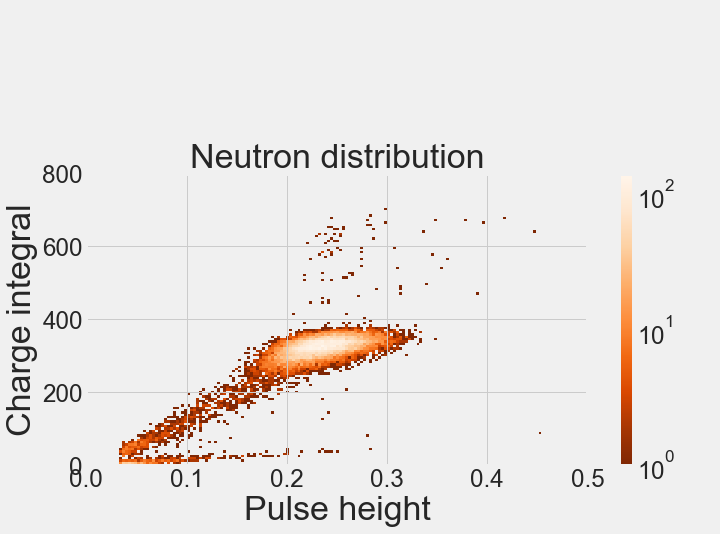

In [28]:
filename = 'neutron.txt'
df = pd.read_csv(filename,sep='\t')

x = df['Pulse height']
y = df['Charge integral']

fig = plt.figure()
ax = fig.add_subplot(111)
axp1 = ax.hist2d(x,y,bins=200,norm=LogNorm(), cmap='Oranges_r')
cb1 = plt.colorbar(axp1[3],ax=[ax],location='right')
plt.title("Neutron distribution", fontsize=34)
plt.xlabel("Pulse height", fontsize=34)
plt.ylabel("Charge integral", fontsize=34)
plt.axis([0,0.5,0,800])
# plt.colorbar()

The graphic above shows the data set that is primarily composed of neutrons with accompanied gammas. There is also noise and outliers  Comparing to the graphs below, the authors note that some of this noise falls into the gamma range. This dataset is used for training. 

[0, 0.5, 0, 800]

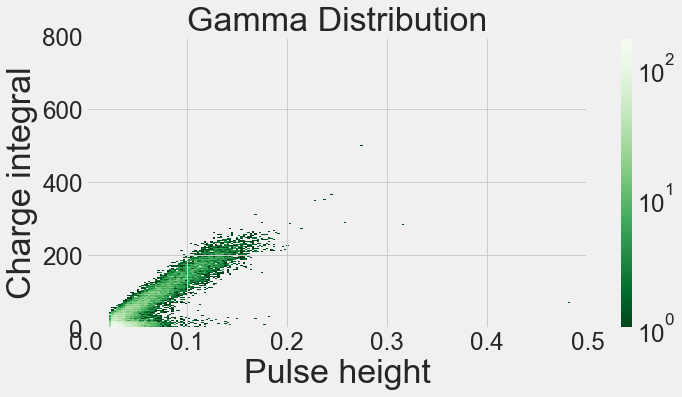

In [29]:
filename = 'gamma.txt'
df2 = pd.read_csv(filename,sep='\t')

x2 = df2['Pulse height']
y2 = df2['Charge integral']

fig = plt.figure()
ax = fig.add_subplot(111)
# axp = ax.hist2d(x,y,bins=200,norm=LogNorm(), cmap='Oranges_r', alpha=0.7)
# cb = plt.colorbar(axp[3],ax=[ax],location='left')
# cb.set_label('Neutron', fontsize=34)
axp1 = ax.hist2d(x2,y2,bins=200,norm=LogNorm(), cmap='Greens_r')
cb1 = plt.colorbar(axp1[3],ax=[ax],location='right')
# cb1.set_label("Gamma", fontsize=34)
plt.title("Gamma Distribution", fontsize=34)
plt.xlabel("Pulse height", fontsize=34)
plt.ylabel("Charge integral", fontsize=34)
plt.axis([0,0.5,0,800])
# plt.legend(['Neutron', 'Gamma'])

The graphic above shows the data set that is primarily composed of gamma particles with some noise. This dataset is used for training and to annotate the points as belonging to the gamma range. 

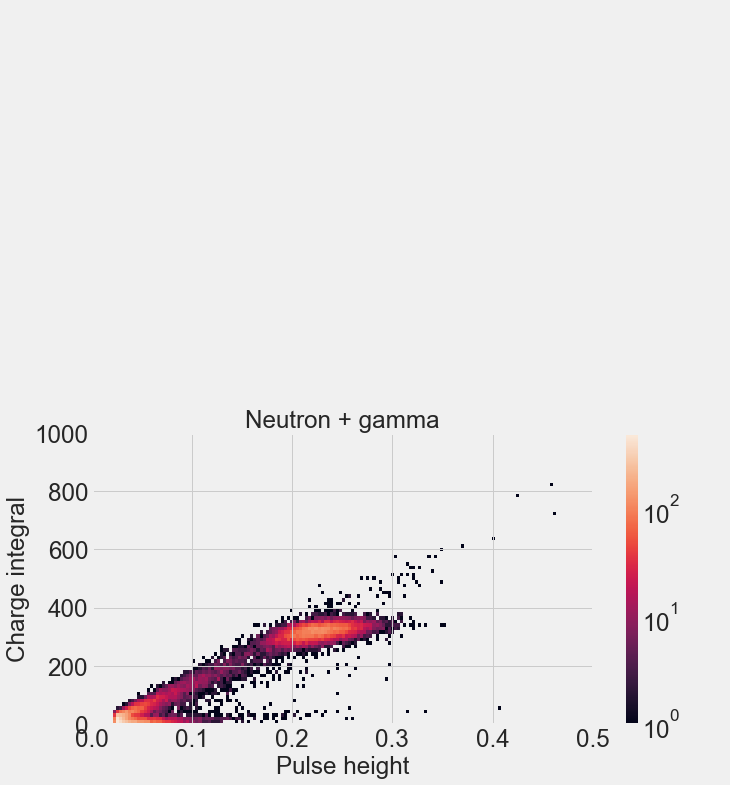

In [3]:
filename = 'neutron_gamma.txt'
df1 = pd.read_csv(filename,sep='\t')

x1 = df1['Pulse height']
y1 = df1['Charge integral']

plt.rcParams["figure.figsize"] = (10,5)
plt.hist2d(x1,y1,bins=200,norm=LogNorm())
plt.title("Neutron + gamma")
plt.xlabel("Pulse height")
plt.ylabel("Charge integral")
plt.axis([0,0.5,0,1000])
plt.colorbar()

This graph shows the dataset used for testing that contains a bit of every type of data. The authors note that there are both nuetrons and gamma particles as well as noise above and below these ranges. Hopefully, our model will be able to differentiate between these three classes. 

## Methodology

### Data Annotation of Unlabeled Dataset

Data annotation is the task of assigning labels to data. In this project, we are dealing with unlabelled dataset. To use supervised learning algorithms such as the Support Vector Machine (SVM), annotation of data is required. 

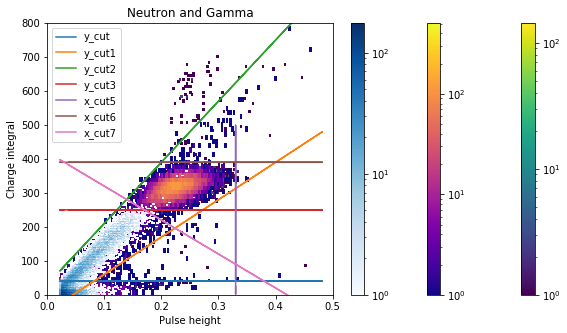

In [5]:
# Noise filter (threshold: charge integral = 30)
noise_filter = y2>0

x_nf = x[noise_filter]
y_nf = y[noise_filter]
x2_nf = x2[noise_filter]
y2_nf = y2[noise_filter]

x_cut = x2
y_cut = [ 40 for i in x_cut]               # noise filter 
y_cut1 = [ 1100*i - 50 for i in x_cut]     # lower bound gamma
y_cut2 = [ 1800*i + 30 for i in x_cut]     # upper bound gamma
y_cut3 = [ 250 for i in x_cut] 
y_cut4 = y2
x_cut4 = [0.17 for i in y_cut4]
x_cut5 = [0.33 for i in y_cut4]
y_cut6 = [390 for i in x_cut]
y_cut7 = [-1000*i + 420 for i in x_cut]

plt.plot(x_cut, y_cut, label="y_cut")
plt.plot(x_cut, y_cut1, label="y_cut1")
plt.plot(x_cut, y_cut2, label="y_cut2")
plt.plot(x_cut, y_cut3, label="y_cut3")

# plt.plot(x_cut, y_cut3)
# plt.plot(x_cut4, y_cut4, label="x_cut4")

plt.plot(x_cut5, y_cut4, label="x_cut5")
plt.plot(x_cut, y_cut6, label="x_cut6")
plt.plot(x_cut, y_cut7, label="x_cut7")


plt.hist2d(x,y,bins=200,norm=LogNorm())
plt.colorbar()
plt.hist2d(x1,y1,bins=200,norm=LogNorm(), cmap="plasma")
plt.colorbar()
plt.hist2d(x2,y2,bins=200,norm=LogNorm(), cmap="Blues")
plt.colorbar()
plt.title("Neutron and Gamma")
plt.xlabel("Pulse height")
plt.ylabel("Charge integral")
plt.axis([0,0.5,0,800])
plt.legend()

This graphic shows the boundaries used to annotate the points for training. 

In [6]:
labels = np.zeros(len(x))
labels1 = np.zeros(len(x))
labels2 = np.zeros(len(x))
df['Labels'] = labels         #neutron
df1['Labels'] = labels        #neutron+gamma
df2['Labels'] = labels        #gamma

### Annotate Dataset 2

noise count = 9635
gamma count = 10353
outliers count = 12
Total counts = 20000 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


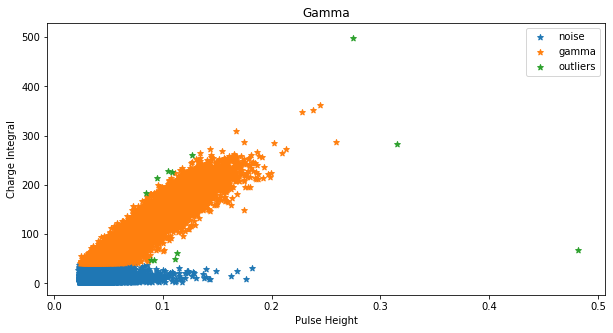

In [7]:
x_cut = x2
y_cut = [ 40 for i in x_cut]               # noise filter 
y_cut1 = [ 1100*i - 50 for i in x_cut]     # lower bound gamma
y_cut2 = [ 1800*i + 30 for i in x_cut]     # upper bound gamma
y_cut3 = [ 250 for i in x_cut] 
y_cut4 = y2
x_cut4 = [0.17 for i in y_cut4]
x_cut5 = [0.33 for i in y_cut4]
y_cut6 = [390 for i in x_cut]
y_cut7 = [-1000*i + 420 for i in x_cut]

# Noise
noise_filter = df2['Charge integral'] <= 40
noise2 = df2[noise_filter]
print("noise count = %d" % len(noise2))
# print(noise2.index)

# Gamma
gamma_filter = df2['Charge integral'] > y_cut
# gamma_filter1 = df2['Charge integral'] <= y_cut3
gamma_filter2 = df2['Charge integral'] >= y_cut1
gamma_filter3 = df2['Charge integral'] <= y_cut2
# gamma_filter4 = df2['Pulse height'] <= x_cut4
gamma_filter5 = df2["Charge integral"] <= y_cut6

gamma2 = df2[gamma_filter & gamma_filter2 & gamma_filter3 & gamma_filter5]
print("gamma count = %d" % len(gamma2))

# Outliers
outliers2 = df2.drop(noise2.index).drop(gamma2.index)
print("outliers count = %d" % len(outliers2))

# Total Counts
print("Total counts = %d " %sum([len(gamma2),len(outliers2), len(noise2)]))

# Visualization of Data Annotation
plt.scatter(noise2['Pulse height'], noise2['Charge integral'], marker = '*', label="noise")
plt.scatter(gamma2['Pulse height'], gamma2['Charge integral'],marker = '*', label="gamma")
plt.scatter(outliers2['Pulse height'], outliers2['Charge integral'], marker = '*',label="outliers")
plt.xlabel("Pulse Height")
plt.ylabel("Charge Integral")
plt.title("Gamma")
plt.legend()

# neutron2['Labels'] = 0*np.ones(len(neutron2))
gamma2['Labels'] = 1*np.ones(len(gamma2))
noise2['Labels'] = 2*np.ones(len(noise2))
outliers2['Labels'] = 3*np.ones(len(outliers2))


This graph demonstrates the position of the different types of particles within the gamma dataset. 

### Annotate Dataset 0


noise count = 624
gamma count = 881
neutron count = 18390
outliers count = 105
Total counts = 20000 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

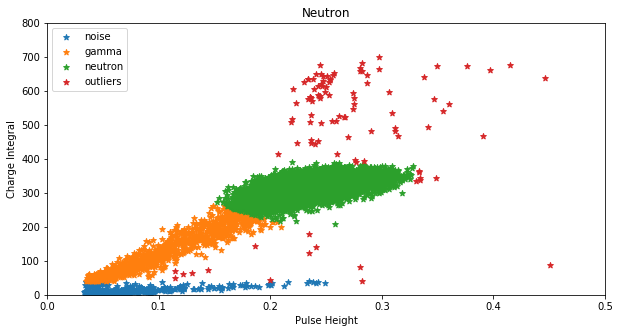

In [8]:
x_cut = x
y_cut = [ 40 for i in x_cut]               # noise filter 
y_cut1 = [ 1100*i - 50 for i in x_cut]     # lower bound gamma
y_cut2 = [ 1800*i + 30 for i in x_cut]     # upper bound gamma
y_cut3 = [ 250 for i in x_cut] 
y_cut4 = y
x_cut4 = [0.17 for i in y_cut4]
x_cut5 = [0.33 for i in y_cut4]
y_cut6 = [390 for i in x_cut]
y_cut7 = [-1000*i + 420 for i in x_cut]

# Noise
noise_filter = df['Charge integral'] <= y_cut
noise = df[noise_filter]
print("noise count = %d" % len(noise))

# Gamma
gamma_filter = df['Charge integral'] > y_cut
# gamma_filter1 = df['Charge integral'] <= y_cut3
gamma_filter2 = df['Charge integral'] >= y_cut1
gamma_filter3 = df['Charge integral'] <= y_cut2
# gamma_filter4 = df['Pulse height'] <= x_cut4
gamma_filter5 = df['Charge integral'] <= y_cut7
gamma = df[gamma_filter & gamma_filter2 & gamma_filter3 & gamma_filter5]
print("gamma count = %d" % len(gamma))

# Neutron
# neutron_filter = df["Charge integral"] > y_cut3
neutron_filter1 = df["Charge integral"] <= y_cut6
# neutron_filter2 = df["Pulse height"] >= x_cut4
neutron_filter3 = df["Pulse height"] <= x_cut5
neutron_filter4 = df["Charge integral"] > y_cut7
neutron = df[neutron_filter1 & neutron_filter3 & neutron_filter4 ]
print("neutron count = %d" % len(neutron))

# Outliers
outliers = df.drop(noise.index).drop(neutron.index).drop(gamma.index)
print("outliers count = %d" % len(outliers))

# Total Counts
print("Total counts = %d " %sum([len(gamma),len(outliers), len(noise), len(neutron)]))

# Visualization of Data Annotation
plt.scatter(noise['Pulse height'], noise['Charge integral'],marker = '*', label="noise")
plt.scatter(gamma['Pulse height'], gamma['Charge integral'], marker = '*',label="gamma")
plt.scatter(neutron['Pulse height'], neutron['Charge integral'], marker = '*',label="neutron")
plt.scatter(outliers['Pulse height'], outliers['Charge integral'],marker = '*', label="outliers")
plt.xlabel("Pulse Height")
plt.ylabel("Charge Integral")
plt.legend()
plt.title("Neutron")
plt.axis([0,0.5,0,800])

neutron['Labels'] = 0*np.ones(len(neutron))
gamma['Labels'] = 1*np.ones(len(gamma))
noise['Labels'] = 2*np.ones(len(noise))
outliers['Labels'] = 3*np.ones(len(outliers))

### Annotate Dataset 1

noise count = 6718
gamma count = 3635
neutron count = 9521
outliers count = 126
Total counts = 20000 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

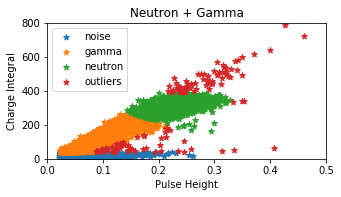

In [96]:
x_cut = x1
y_cut = [ 40 for i in x_cut]               # noise filter 
y_cut1 = [ 1100*i - 50 for i in x_cut]     # lower bound gamma
y_cut2 = [ 1800*i + 30 for i in x_cut]     # upper bound gamma
# y_cut3 = [ 250 for i in x_cut] 
y_cut4 = y1
# x_cut4 = [0.17 for i in y_cut4]
x_cut5 = [0.33 for i in y_cut4]
y_cut6 = [390 for i in x_cut]
y_cut7 = [-1000*i + 420 for i in x_cut]

# Noise
noise_filter = df1['Charge integral'] <= y_cut
noise1 = df1[noise_filter]
print("noise count = %d" % len(noise1))

# Gamma
gamma_filter = df1['Charge integral'] > y_cut
# gamma_filter1 = df1['Charge integral'] <= y_cut3
gamma_filter2 = df1['Charge integral'] >= y_cut1
gamma_filter3 = df1['Charge integral'] <= y_cut2
# gamma_filter4 = df1['Pulse height'] <= x_cut4
gamma_filter5 = df1['Charge integral'] <= y_cut7
gamma1 = df1[gamma_filter & gamma_filter2 & gamma_filter3 & gamma_filter5]
print("gamma count = %d" % len(gamma1))

# Neutron
# neutron_filter = df1["Charge integral"] > y_cut3
neutron_filter1 = df1["Charge integral"] <= y_cut6
# neutron_filter2 = df1["Pulse height"] >= x_cut4
neutron_filter3 = df1["Pulse height"] <= x_cut5
neutron_filter4 = df1["Charge integral"] > y_cut7
neutron1 = df1[neutron_filter1 & neutron_filter3 & neutron_filter4 ]
print("neutron count = %d" % len(neutron1))

# Outliers
outliers1 = df1.drop(noise1.index).drop(neutron1.index).drop(gamma1.index)
print("outliers count = %d" % len(outliers1))

# Total Counts
print("Total counts = %d " %sum([len(gamma1),len(outliers1), len(noise1), len(neutron1)]))

# Visualization of Data Annotation
plt.rcParams["figure.figsize"] = (5,2.5)
plt.scatter(noise1['Pulse height'], noise1['Charge integral'],marker = '*', label="noise")
plt.scatter(gamma1['Pulse height'], gamma1['Charge integral'], marker = '*',label="gamma")
plt.scatter(neutron1['Pulse height'], neutron1['Charge integral'], marker = '*',label="neutron")
plt.scatter(outliers1['Pulse height'], outliers1['Charge integral'],marker = '*', label="outliers")
plt.xlabel("Pulse Height")
plt.ylabel("Charge Integral")
plt.title("Neutron + Gamma")
plt.legend()
plt.axis([0,0.5,0,800])

neutron1['Labels'] = 0*np.ones(len(neutron1))
gamma1['Labels'] = 1*np.ones(len(gamma1))
noise1['Labels'] = 2*np.ones(len(noise1))
outliers1['Labels'] = 3*np.ones(len(outliers1))

### Annotated Datasets

dataset : Neutron 

dataset1 : Neutron + Gamma 

dataset2 : Gamma 


In [10]:
dataset = neutron.append(gamma).append(noise).append(outliers)
dataset1 = neutron1.append(gamma1).append(noise1).append(outliers1)
dataset2 = gamma2.append(noise2).append(outliers2)

data = dataset.append(dataset1).append(dataset2)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = data[["Pulse height", "Charge integral"]].values
X = min_max_scaler.fit_transform(X)
y = data["Labels"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("y_test")
print("Neutron count: %d" % np.count_nonzero(y_test == 0))
print("Gamma count: %d" % np.count_nonzero(y_test == 1))
print("Noise count: %d" % np.count_nonzero(y_test == 2))
print("Outliers count: %d" % np.count_nonzero(y_test == 3))

y_test
Neutron count: 9154
Gamma count: 4902
Noise count: 5683
Outliers count: 61


noise count = 19800
gamma count = 0
neutron count = 0
outliers count = 0
Total counts = 19800 


[0, 0.5, 0, 800]

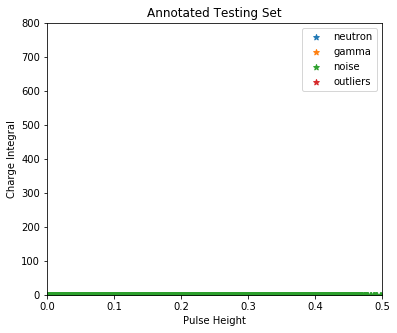

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

df_test = pd.DataFrame(data=X_test, columns=["Pulse height", "Charge integral"])
df_test.head(5)

x_cut = X_test[:,0]
y_cut = [ 40 for i in x_cut]               # noise filter 
y_cut1 = [ 1100*i - 50 for i in x_cut]     # lower bound gamma
y_cut2 = [ 1800*i + 30 for i in x_cut]     # upper bound gamma
# y_cut3 = [ 250 for i in x_cut] 
y_cut4 = X_test[:,1]
# x_cut4 = [0.17 for i in y_cut4]
x_cut5 = [0.33 for i in y_cut4]
y_cut6 = [390 for i in x_cut]
y_cut7 = [-1000*i + 420 for i in x_cut]

# Noise
noise_filter = df_test['Charge integral'] <= y_cut
noise_test = df_test[noise_filter]
print("noise count = %d" % len(noise_test))

# Gamma
gamma_filter = df_test['Charge integral'] > y_cut
# gamma_filter1 = df1['Charge integral'] <= y_cut3
gamma_filter2 = df_test['Charge integral'] >= y_cut1
gamma_filter3 = df_test['Charge integral'] <= y_cut2
# gamma_filter4 = df1['Pulse height'] <= x_cut4
gamma_filter5 = df_test['Charge integral'] <= y_cut7
gamma_test = df_test[gamma_filter & gamma_filter2 & gamma_filter3 & gamma_filter5]
print("gamma count = %d" % len(gamma_test))

# Neutron
# neutron_filter = df1["Charge integral"] > y_cut3
neutron_filter1 = df_test["Charge integral"] <= y_cut6
# neutron_filter2 = df1["Pulse height"] >= x_cut4
neutron_filter3 = df_test["Pulse height"] <= x_cut5
neutron_filter4 = df_test["Charge integral"] > y_cut7
neutron_test = df_test[neutron_filter1 & neutron_filter3 & neutron_filter4 ]
print("neutron count = %d" % len(neutron_test))

# Outliers
outliers_test = df_test.drop(noise_test.index).drop(neutron_test.index).drop(gamma_test.index)
print("outliers count = %d" % len(outliers_test))

# Total Counts
print("Total counts = %d " %sum([len(gamma_test),len(outliers_test), len(noise_test), len(neutron_test)]))

# Visualization of Data Annotation
plt.figure(figsize=(6,5))
plt.scatter(neutron_test['Pulse height'], neutron_test['Charge integral'], marker = '*',label="neutron")
plt.scatter(gamma_test['Pulse height'], gamma_test['Charge integral'], marker = '*',label="gamma")
plt.scatter(noise_test['Pulse height'], noise_test['Charge integral'],marker = '*', label="noise")
plt.scatter(outliers_test['Pulse height'], outliers_test['Charge integral'],marker = '*', label="outliers")
plt.xlabel("Pulse Height")
plt.ylabel("Charge Integral")
plt.title("Annotated Testing Set")
plt.legend()
plt.axis([0,0.5,0,800])

# K-Nearest Neighbor

Accuracy = 0.9980
Elapsed time = 0.5376 s


[0, 1, 0, 0.6]

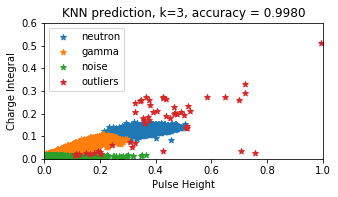

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import time

start_time = time.time()
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,y_train)

y_pred = neigh.predict(X_test)
elapsed_time_kNN = time.time() - start_time
accuracy_kNN = accuracy_score(y_test, y_pred)
print("Accuracy = %0.4f" % accuracy_kNN)
print("Elapsed time = %0.4f s" % elapsed_time_kNN)

#kNN prediction

neutron_pred = X_test[y_pred == 0]
gamma_pred= X_test[y_pred == 1]
noise_pred= X_test[y_pred == 2]
outliers_pred= X_test[y_pred == 3]

plt.rcParams["figure.figsize"] = (5,2.5)
# plt.figure(figsize=(6,5))
plt.scatter(neutron_pred[:,0], neutron_pred[:,1],marker = '*', label="neutron")
plt.scatter(gamma_pred[:,0], gamma_pred[:,1],marker = '*', label="gamma")
plt.scatter(noise_pred[:,0], noise_pred[:,1],marker = '*', label="noise")
plt.scatter(outliers_pred[:,0],outliers_pred[:,1],marker = '*', label="outliers")
plt.xlabel("Pulse Height")
plt.ylabel("Charge Integral")
plt.title("KNN prediction, k=%d, accuracy = %0.4f" %(k,accuracy_kNN))
plt.legend()
plt.axis([0,1,0,0.6])
# plt.axis([0,0.5,0,800])

# Accuracy

Accuracy = 0.9980
Accuracy = 0.9976
Accuracy = 0.9980
Accuracy = 0.9976
Accuracy = 0.9979
Accuracy = 0.9973
Accuracy = 0.9975
Accuracy = 0.9972
Accuracy = 0.9973


Text(0, 0.5, 'Accuracy (%)')

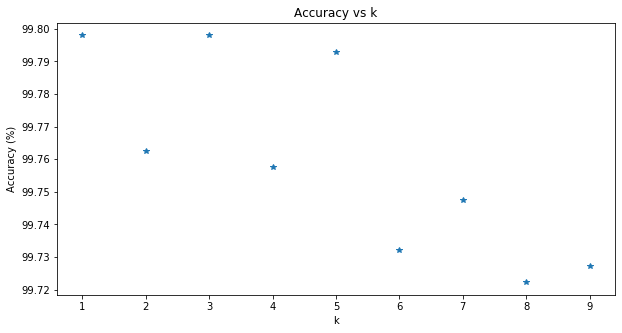

In [16]:
from sklearn.neighbors import KNeighborsClassifier

k = np.arange(1,10)
acc_kNN = []

def kNN(k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)

    y_pred = neigh.predict(X_test)
    accuracy = np.count_nonzero(y_pred == y_test)/len(y_test)
    acc_kNN.append(accuracy*100)
    print("Accuracy = %0.4f" % accuracy)
    
for i in k:
    kNN(i)
    
plt.plot(k, acc_kNN, '*')
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")

# Confusion Matrix

<Figure size 360x360 with 0 Axes>

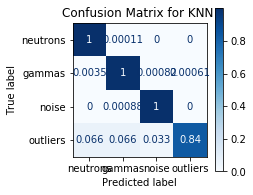

In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix


k=3
classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
class_names = ['neutrons', 'gammas', 'noise', 'outliers']
plt.rcParams["figure.figsize"] = (3,3)
plt.figure(figsize=[5,5])
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

plt.title("Confusion Matrix for KNN ")

plt.show()


# K-Fold Cross-Validation

[0, 9, 98, 100]

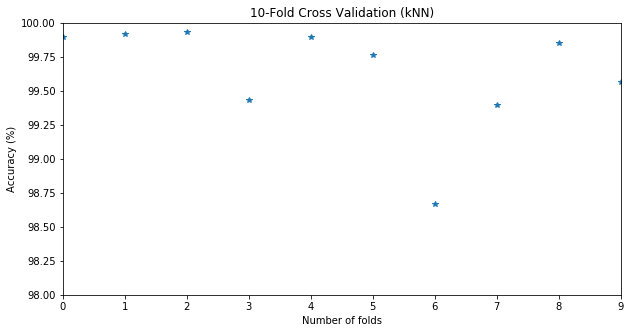

In [73]:
from sklearn.model_selection import KFold
acc_KFold_KNN = []
time_KFold_KNN = []

kf = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train,y_train)

    start_time = time.time()
    y_pred = neigh.predict(X_test)
    elapsed_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)
    acc_KFold_KNN.append(accuracy*100)
    time_KFold_KNN.append(elapsed_time)
    
plt.plot(acc_KFold_KNN,'*')
plt.title("10-Fold Cross Validation (kNN)")
plt.xlabel("Number of folds")
plt.ylabel("Accuracy (%)")
plt.axis([0,9,98,100])

Text(0, 0.5, 'Accuracy')

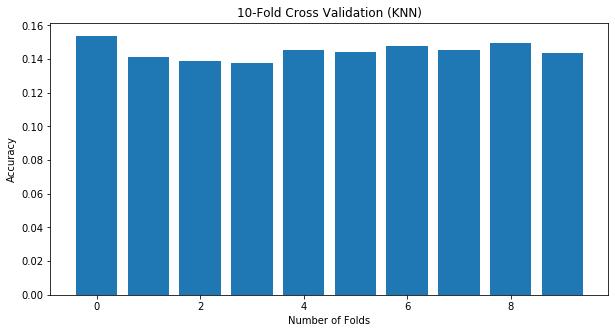

In [74]:
plt.bar(np.arange(10), time_KFold_KNN)
plt.title("10-Fold Cross Validation (KNN)")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")


# KMeans Clustering

[0, 1, 0, 0.6]

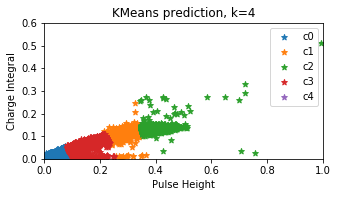

In [100]:
from sklearn.cluster import KMeans
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

k = 4
kmeans = KMeans(n_clusters=k,random_state=0).fit(X_train)
y_pred = kmeans.predict(X_test)

# a = np.unique(y_test[y_pred == 2])

# from scipy import stats
# stats.mode(a)[0][0]

c0 = X_test[y_pred == 0]
c1 = X_test[y_pred == 1]
c2 = X_test[y_pred == 2]
c3 = X_test[y_pred == 3]
c4 = X_test[y_pred == 4]

plt.rcParams["figure.figsize"] = (5,2.5)
plt.scatter(c0[:,0], c0[:,1],marker = '*', label='c0')
plt.scatter(c1[:,0], c1[:,1],marker = '*', label='c1')
plt.scatter(c2[:,0], c2[:,1],marker = '*', label='c2')
plt.scatter(c3[:,0], c3[:,1],marker = '*', label='c3')
plt.scatter(c4[:,0], c4[:,1],marker = '*', label='c4')
plt.legend()
plt.title("KMeans prediction, k=%d" % k)
plt.xlabel("Pulse Height")
plt.ylabel("Charge Integral")
plt.axis([0,1,0,0.6])
# plt.axis([0,0.5,0,800])
        
# c0 = X_train[kmeans.labels_ == 0]
# c1 = X_train[kmeans.labels_ == 1]
# c2 = X_train[kmeans.labels_ == 2]
# c3 = X_train[kmeans.labels_ == 3]

# plt.scatter(c0[:,0], c0[:,1], label='c0')
# plt.scatter(c1[:,0], c1[:,1], label='c1')
# plt.scatter(c2[:,0], c2[:,1], label='c2')
# plt.scatter(c3[:,0], c3[:,1], label='c3')
# plt.legend()
# plt.axis([0,0.5,0,800])

In [22]:
y_pred = kmeans.predict(X_test)

y_pred1= []
for i in y_pred:
    if i == 0:
        y_pred1.append(2)
    if i == 1:
        y_pred1.append(0)
    if i == 2:
        y_pred1.append(1)
    if i == 3:
        y_pred1.append(3)
        
y_pred1 = np.transpose(y_pred1)

neutron_pred1 = X_test[y_pred1 == 0]
gamma_pred1 = X_test[y_pred1 == 1]
noise_pred1 = X_test[y_pred1 == 2]
outliers_pred1 = X_test[y_pred1 == 3]

accuracy = np.count_nonzero(y_pred1 == y_test)/len(y_test)
print("Accuracy = %0.4f" % accuracy)

plt.scatter(neutron_pred1[:,0], neutron_pred1[:,1],marker = '*', label="neutron")
plt.scatter(gamma_pred1[:,0], gamma_pred1[:,1],marker = '*', label="gamma")
plt.scatter(noise_pred1[:,0], noise_pred1[:,1],marker = '*', label="noise")
plt.scatter(outliers_pred1[:,0],outliers_pred1[:,1],marker = '*', label="outliers")
plt.xlabel("Pulse Height")
plt.ylabel("Charge Integral")
plt.title("KMeans Clustering prediction, k=%d, accuracy = %0.4f" %(k,accuracy))
plt.legend()
plt.axis([0,1,0,0.6])
# plt.axis([0,0.5,0,800])


IndexError: boolean index did not match indexed array along dimension 0; dimension is 19800 but corresponding boolean dimension is 17199

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from math import sqrt

k = np.arange(1,5)
acc_kMeans = []
rmse_kMeans = []

def kMeans(k):
    kmeans = KMeans(n_clusters=k,random_state=0).fit(X_train)
    y_pred = kmeans.predict(X_test)

    y_pred1= []
    for i in y_pred:
        if i == 0:
            y_pred1.append(2)
        if i == 1:
            y_pred1.append(0)
        if i == 2:
            y_pred1.append(1)
        if i == 3:
            y_pred1.append(3)

    y_pred1 = np.transpose(y_pred1)
    
    neutron_pred1 = X_test[y_pred1 == 0]
    gamma_pred1 = X_test[y_pred1 == 1]
    noise_pred1 = X_test[y_pred1 == 2]
    outliers_pred1 = X_test[y_pred1 == 3]

    accuracy = np.count_nonzero(y_pred1 == y_test)/len(y_test)
    acc_kMeans.append(accuracy*100)
    print("Accuracy = %0.4f" % accuracy)
    
    mse = mean_squared_error(y_test,y_pred)
    rmse = sqrt(mse)
    rmse_kMeans.append(rmse)
    
    
for i in k:
    kMeans(i)
    
plt.plot(k, acc_kMeans, '*')
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")

# plt.plot(k,rmse_kMeans,'*')
# plt.title("RMSE vs k")
# plt.xlabel("k")
# plt.ylabel("Root Mean Square Error (RMSE)")


### Support Vector Machine

Accuracy = 0.9923
Time elapsed = 2.67307 s


[0, 1, 0, 0.6]

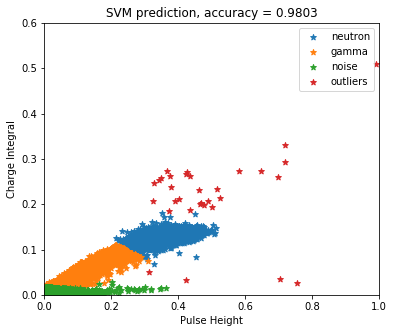

In [82]:
from sklearn.svm import SVC
import time 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

start_time = time.time()
clf = SVC() #this implements one vs. rest algorithm for one vs one use .SVC
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
elapsed_time_SVM = time.time() - start_time
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy = %0.4f" % accuracy_SVM)
print("Time elapsed = %0.5f s" % elapsed_time_SVM)

neutron_pred = X_test[y_pred == 0]
gamma_pred= X_test[y_pred == 1]
noise_pred= X_test[y_pred == 2]
outliers_pred= X_test[y_pred == 3]

plt.figure(figsize=(6,5))
plt.scatter(neutron_pred[:,0], neutron_pred[:,1],marker = '*', label="neutron")
plt.scatter(gamma_pred[:,0], gamma_pred[:,1],marker = '*', label="gamma")
plt.scatter(noise_pred[:,0], noise_pred[:,1],marker = '*', label="noise")
plt.scatter(outliers_pred[:,0],outliers_pred[:,1],marker = '*', label="outliers")
plt.xlabel("Pulse Height")
plt.ylabel("Charge Integral")
plt.title("SVM prediction, accuracy = %0.4f" %(accuracy))
plt.legend()
plt.axis([0,1,0,0.6])
# plt.axis([0,0.5,0,800])

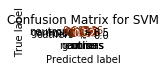

In [119]:

classifier = SVC().fit(X_train,y_train)
class_names = ['neutrons', 'gammas', 'noise', 'outliers']
disp = plot_confusion_matrix(classifier, X_test, y_test,display_labels=class_names,cmap=plt.cm.Oranges,normalize='true')
plt.title("Confusion Matrix for SVM")
plt.show()

Text(0.5, 1.0, '10-Fold Cross Validation (SVM)')

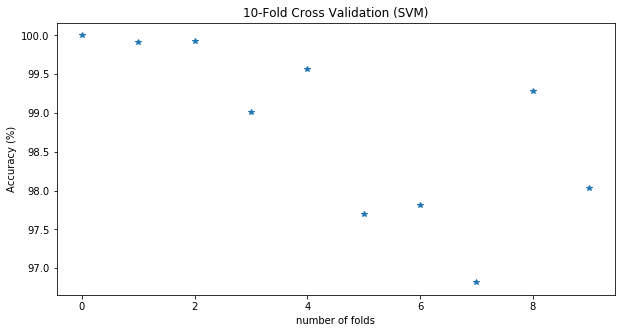

In [76]:
from sklearn.model_selection import KFold
acc_KFold_SVM = []
time_KFold_SVM = []

kf = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    neigh = SVC()
    neigh.fit(X_train,y_train)
    start_time = time.time()
    y_pred = neigh.predict(X_test)
    elapsed_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)
    acc_KFold_SVM.append(accuracy*100)
    time_KFold_SVM.append(elapsed_time)
    
plt.plot(acc_KFold_SVM,'*')
plt.xlabel('number of folds')
plt.ylabel("Accuracy (%)")
plt.title("10-Fold Cross Validation (SVM)")
# plt.axis([0,9,98,100])

Text(0.5, 1.0, 'K-Fold Cross Validation (Computational Cost)')

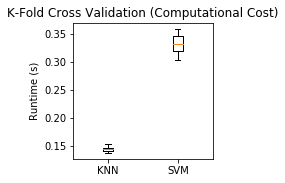

In [113]:
# plt.subplot(121)
a = np.array(acc_KFold_KNN).reshape(10,1)
b = np.array(acc_KFold_SVM).reshape(10,1)
acc_KFold = np.concatenate((a,b), axis=1)
acc_KFold

green_diamond = dict(markerfacecolor='g', marker='D')
# plt.figure(figsize=[2.5,2.5])
# plt.boxplot(acc_KFold, flierprops=green_diamond, labels=['KNN', 'SVM'])
# plt.ylabel("Accuracy")
# plt.title("K-Fold Cross Validation (Accuracy)")

# plt.subplot(122)

a = np.array(time_KFold_KNN).reshape(10,1)
b = np.array(time_KFold_SVM).reshape(10,1)
time_KFold = np.concatenate((a,b), axis=1)

green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure(figsize=[2.5,2.5])
plt.boxplot(time_KFold, flierprops=green_diamond, labels=['KNN', 'SVM'])
plt.ylabel("Runtime (s)")
plt.title("K-Fold Cross Validation (Computational Cost)")

Text(0.5, 1.0, 'K-Fold Cross Validation (Computational Cost)')

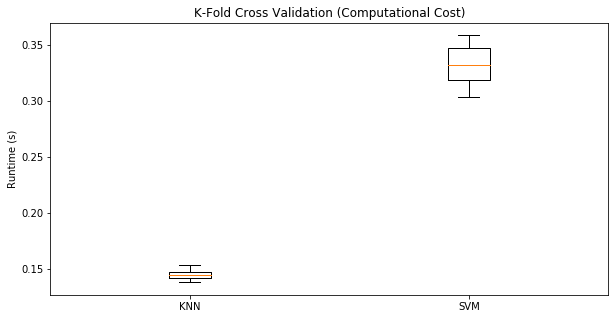

In [78]:
a = np.array(time_KFold_KNN).reshape(10,1)
b = np.array(time_KFold_SVM).reshape(10,1)
time_KFold = np.concatenate((a,b), axis=1)

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(time_KFold, flierprops=green_diamond, labels=['KNN', 'SVM'])
plt.ylabel("Runtime (s)")
plt.title("K-Fold Cross Validation (Computational Cost)")

Text(0, 0.5, 'Accuracy')

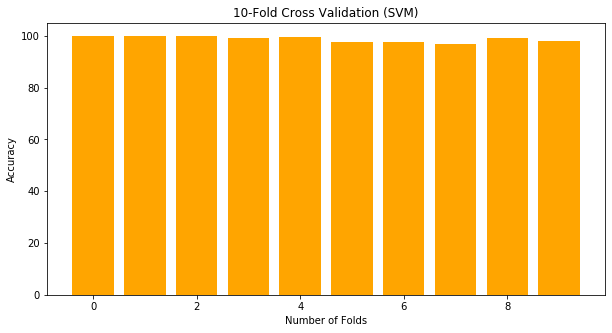

In [26]:
plt.bar(np.arange(10), acc_KFold, color="orange")
plt.title("10-Fold Cross Validation (SVM)")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")

(0.98, 1.0)

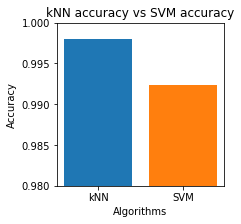

In [141]:
methods = ['KNN', 'SVM']
accuracies = [accuracy_kNN, accuracy_SVM]

# plt.subplot(121)
# plt.bar(methods, accuracies)
# plt.figure(figsize=(6,5))
plt.figure(figsize=(3,3))
plt.bar(['kNN'], accuracy_kNN)
plt.bar(['SVM'], accuracy_SVM)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("kNN accuracy vs SVM accuracy")
plt.ylim((0.98,1.00))

# plt.subplot(122)
# plt.bar(['kNN'], elapsed_time_kNN)
# plt.bar(['SVM'], elapsed_time_SVM)
# plt.xlabel("Algorithms")
# plt.ylabel("Elapsed time (s)")
# plt.title("kNN elapsed time vs SVM elapsed time")

Text(0.5, 1.0, 'kNN elapsed time vs SVM elapsed time')

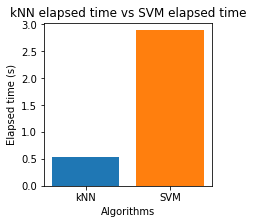

In [140]:
plt.figure(figsize=(3,3))
plt.bar(['kNN'], elapsed_time_kNN)
plt.bar(['SVM'], elapsed_time_SVM)
plt.xlabel("Algorithms")
plt.ylabel("Elapsed time (s)")
plt.title("kNN elapsed time vs SVM elapsed time")

### Evaluation

Since we are dealing with an unlabelled dataset, we would be using unsupervised learning algorithms for clustering. A set of appropriate evaluation metrics would be essential in helping us to find the optimal hyperparameters for different learning algorithms. Currently, we plan to use SVM, BDSCAN, and Kmeans clustering on our dataset. In order to choose a set of optimal hyperparameters for each learning algorithms, we will be using the Silhouette index, Dunn index, Calinksi-Harabasz index, and other suitable methods. We will do 10-fold cross-validation on our dataset to investigate the performance consistency of the algorithms. For the Silhouette index, the silhouette value is a measure of how similar an object is to its own cluster compared to other clusters. The Silhouette index ranges from -1 to 1. A high value indicates the object is well matched to its own cluster and poorly matched to neighboring clusters. So we will choose a set of hyperparameters that will contribute to a high value of the Silhouette index. The Dunn index is similar to the Silhouette index where a high value of the Dunn index indicates better clustering. The goal of the Dunn index is to identify sets of clusters that are compact, with a small variance between members of the cluster, and well-separated (means of different clusters are sufficiently far apartment as compared to the within-cluster variance). The Clainski-Harabasz index, also known as the Variance Ratio Criterion, is the ratio of the sum of between-cluster dispersion and of inter-cluster dispersion for all clusters. A high Calinksi-Harabasz score relates to a model with better-defined clusters. All of the above-mentioned learning algorithms and evaluation methods are available in Python packages with the best-optimized performance. With optimized learning algorithms coupled with PySpark, our approach and methodology seem promising thus far and the impact of a successful project will be very beneficial in the detection system that I’ve been developing in collaboration with the detector team at ORNL.


In [29]:
# Here we evaluate the model 
#This will be done on metrics still yet to be decided upon


### Iterations

Here we will keep track of the process of tuning parameters to optimize the model. 

## Results 

Here we will present results from our final model. These will include graphs of the classifications as well as numerical results on how well the model performed. 

## Discussion 
This cell will include a summary of the results, conclusions drawn, as well future work that could be added to this project. 

## References
Self-explanatory

## Acknowledgements